<a href="https://colab.research.google.com/github/tarumi283/tarumi/blob/main/%CE%94%CE%94CT%E6%B3%95_%E5%8A%B9%E7%8E%87%E7%A2%BA%E8%AA%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ターゲット遺伝子のPCR効率: 77.83%
ハウスキーピング遺伝子のPCR効率: 83.15%
ΔΔCt法の適合性: 不適合


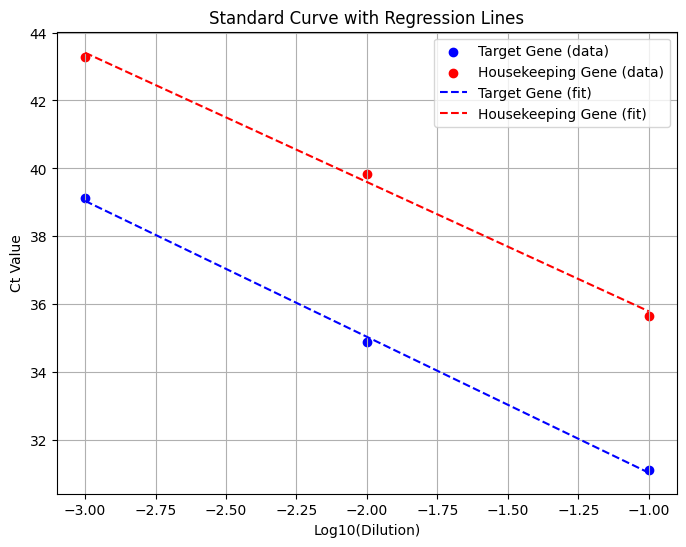

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# サンプルデータ（検量線のCt値と対応する濃度）
data = {
    'Dilution': [0.1, 0.01, 0.001],  # 希釈倍率
    'Target_Ct': [31.12, 34.89, 39.12],  # ターゲット遺伝子のCt値
    'Housekeeping_Ct': [35.67, 39.85, 43.28]  # ハウスキーピング遺伝子のCt値
}

# データフレームの作成
df = pd.DataFrame(data)

# Ct値をもとに濃度の対数を計算
df['Log_Dilution'] = np.log10(df['Dilution'])

# 線形回帰で傾きを計算（TargetとHousekeepingそれぞれ）
target_slope, target_intercept = np.polyfit(df['Log_Dilution'], df['Target_Ct'], 1)
housekeeping_slope, housekeeping_intercept = np.polyfit(df['Log_Dilution'], df['Housekeeping_Ct'], 1)

# PCR効率を計算
target_efficiency = (10 ** (-1 / target_slope)) - 1
housekeeping_efficiency = (10 ** (-1 / housekeeping_slope)) - 1

# ΔΔCt法の適合判定
delta_efficiency = abs(target_efficiency - housekeeping_efficiency)
valid_ddct = (delta_efficiency < 0.05) and (0.90 <= target_efficiency + 1 <= 1.10) and (0.90 <= housekeeping_efficiency + 1 <= 1.10)

# 結果の表示
print("ターゲット遺伝子のPCR効率: {:.2f}%".format(target_efficiency * 100))
print("ハウスキーピング遺伝子のPCR効率: {:.2f}%".format(housekeeping_efficiency * 100))
print("ΔΔCt法の適合性: {}".format("適合" if valid_ddct else "不適合"))

# 検量線をプロット（回帰線付き）
plt.figure(figsize=(8, 6))
plt.scatter(df['Log_Dilution'], df['Target_Ct'], label='Target Gene (data)', color='blue')
plt.scatter(df['Log_Dilution'], df['Housekeeping_Ct'], label='Housekeeping Gene (data)', color='red')

# 回帰直線をプロット
x_fit = np.linspace(min(df['Log_Dilution']), max(df['Log_Dilution']), 100)
y_target_fit = target_slope * x_fit + target_intercept
y_housekeeping_fit = housekeeping_slope * x_fit + housekeeping_intercept

plt.plot(x_fit, y_target_fit, '--', color='blue', label='Target Gene (fit)')
plt.plot(x_fit, y_housekeeping_fit, '--', color='red', label='Housekeeping Gene (fit)')

plt.xlabel('Log10(Dilution)')
plt.ylabel('Ct Value')
plt.title('Standard Curve with Regression Lines')
plt.legend()
plt.grid()
plt.show()